# Keras代码示例

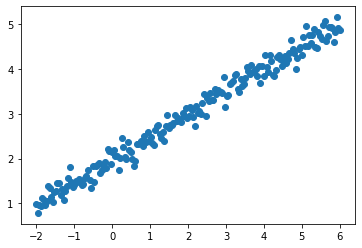

Epoch 1/100
160/160 [==============================] - 0s 2ms/step - loss: 30.0984
Epoch 2/100
160/160 [==============================] - 0s 345us/step - loss: 5.0145
Epoch 3/100
160/160 [==============================] - 0s 38us/step - loss: 7.9383
Epoch 4/100
160/160 [==============================] - 0s 85us/step - loss: 0.7997
Epoch 5/100
160/160 [==============================] - 0s 32us/step - loss: 1.1993
Epoch 6/100
160/160 [==============================] - 0s 36us/step - loss: 0.2173
Epoch 7/100
160/160 [==============================] - 0s 53us/step - loss: 0.1391
Epoch 8/100
160/160 [==============================] - 0s 29us/step - loss: 0.0752
Epoch 9/100
160/160 [==============================] - 0s 43us/step - loss: 0.0366
Epoch 10/100
160/160 [==============================] - 0s 44us/step - loss: 0.0512
Epoch 11/100
160/160 [==============================] - 0s 39us/step - loss: 0.0477
Epoch 12/100
160/160 [==============================] - 0s 85us/step - loss: 0.0509


160/160 [==============================] - 0s 25us/step - loss: 0.0270
Epoch 99/100
160/160 [==============================] - 0s 38us/step - loss: 0.0272
Epoch 100/100
160/160 [==============================] - 0s 25us/step - loss: 0.0272
Training -----------
train cost:  0.026925737
train cost:  0.026892304
train cost:  0.026891846
train cost:  0.026891842
train cost:  0.026891833
40/40 [==============================] - 0s 3ms/step

Testing ------------
40/40 [==============================] - 0s 22us/step
test cost: 0.021539945155382156
Weights= [[0.5104919]] 
biases= [1.9757351]


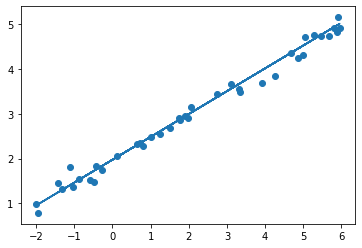

In [15]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense

from keras.optimizers import SGD
 
X = np.linspace(-2, 6, 200)
np.random.shuffle(X)
Y = 0.5 * X + 2 + 0.15 * np.random.randn(200,) 
 
# plot data
plt.scatter(X, Y)
plt.show()
 
X_train, Y_train = X[:160], Y[:160]     # train first 160 data points
X_test, Y_test = X[160:], Y[160:]       # test remaining 40 data points

model = Sequential()
model.add(Dense(input_dim=1, units=1))

#model.compile(loss='mse', optimizer='sgd')

model.compile(loss='mse', optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))

model.fit(X_train, Y_train, epochs=100, batch_size=64)

#model.train_on_batch(X_batch, Y_batch)

print('Training -----------')
for step in range(100):
    cost = model.train_on_batch(X_train, Y_train)
    if step % 20 == 0:
        print('train cost: ', cost)

cost = model.evaluate(X_test, Y_test, batch_size=40)


print('\nTesting ------------')
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=40)
print('test cost:', cost)
W, b = model.layers[0].get_weights()
print('Weights=', W, '\nbiases=', b)

Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()

很简单的代码，代码只是用了一层全连接层，而且只有一个神经元（因为所要求解的线性回归问题比较简单），下面的代码将使用一个比较复杂的神经网络模型。

# Keras神经网络代码示例

In [2]:
import numpy as np
import random
import keras
import matplotlib.pyplot as plt
%matplotlib inline
 
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


首先导入数据集

In [3]:

X_train = X_train.reshape(X_train.shape[0], -1) # 等价于X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(X_test.shape[0], -1)    # 等价于X_test = X_test.reshape(10000,784)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [4]:
print(X_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

W0915 13:21:00.976431 140560843339584 deprecation.py:506] From /home/tuzhuo/app/anaconda3/envs/jupyter/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
__________

In [8]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop', #RMSprop()
             metrics=['accuracy'])

In [9]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
 
# metrics means you want to get more results during the training process
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                   verbose = 1, validation_data=[X_test, y_test])

W0915 13:21:01.341476 140560843339584 deprecation.py:323] From /home/tuzhuo/app/anaconda3/envs/jupyter/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 175us/step - loss: 0.2477 - acc: 0.9226 - val_loss: 0.1016 - val_acc: 0.9683
Epoch 2/10
60000/60000 [==============================] - 9s 148us/step - loss: 0.1019 - acc: 0.9688 - val_loss: 0.0803 - val_acc: 0.9752
Epoch 3/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0755 - acc: 0.9774 - val_loss: 0.0799 - val_acc: 0.9774
Epoch 4/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0602 - acc: 0.9819 - val_loss: 0.0710 - val_acc: 0.9794
Epoch 5/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0512 - acc: 0.9845 - val_loss: 0.0829 - val_acc: 0.9781
Epoch 6/10
60000/60000 [==============================] - 9s 149us/step - loss: 0.0441 - acc: 0.9866 - val_loss: 0.0773 - val_acc: 0.9811
Epoch 7/10
60000/60000 [==============================] - 9s 150us/step - loss: 0.0374 - acc: 0.9888 - val_loss: 0.0769 -

In [11]:
history.params
#print(history.params)

{'batch_size': 128,
 'epochs': 10,
 'steps': None,
 'samples': 60000,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}

In [12]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.09030706779173156
Test accuracy: 0.9824


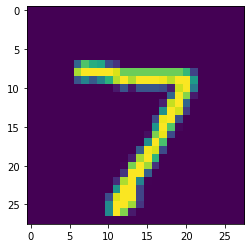

In [13]:
X_test_0 = X_test[0,:].reshape(1,784)
y_test_0 = y_test[0,:]
plt.imshow(X_test_0.reshape([28,28]))

In [14]:
pred = model.predict(X_test_0[:])
print('Label of testing sample', np.argmax(y_test_0))
print('Output of the softmax layer', pred[0])
print('Network prediction:', np.argmax([pred[0]]))

Label of testing sample 7
Output of the softmax layer [7.4004012e-21 2.9600777e-17 3.6683981e-15 1.3916879e-14 2.5601850e-21
 3.3232695e-18 1.8442366e-28 1.0000000e+00 2.6700661e-19 9.3038684e-12]
Network prediction: 7
